In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Day_9_Timeseries_visualization/Data_Sets/electricity.csv')
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [5]:
df.shape

(46011, 10)

In [6]:
df.isnull().sum()

,0
DateTime,0
Consumption,0
Production,0
Nuclear,0
Wind,0
Hydroelectric,0
Oil and Gas,0
Coal,0
Solar,0
Biomass,0


In [7]:
df['Wind']

,Wind
0,79
1,96
2,142
3,191
4,159
...,...
46006,505
46007,671
46008,868
46009,908


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Day_9_Timeseries_visualization/Data_Sets/electricity.csv")
df.head().style.set_properties(
    **{
        'background-color' : 'OliveDrab',
        'color' : 'white',
        'border-color' : 'darkblack'
    }
)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [11]:
df['DateTime'] =pd.to_datetime(df['DateTime'])

In [12]:
df.describe().style.background_gradient(cmap='rainbow')

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,2021-08-16 11:19:47.715981056,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
min,2019-01-01 00:00:00,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,2020-04-24 06:30:00,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,2021-08-16 12:00:00,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,2022-12-08 15:30:00,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,2024-03-31 23:00:00,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000
std,nan,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554


In [13]:
print("Starting Date: ", df['DateTime'].min())
print("End Date : ",df['DateTime'].max())

Starting Date:  2019-01-01 00:00:00
End Date :  2024-03-31 23:00:00


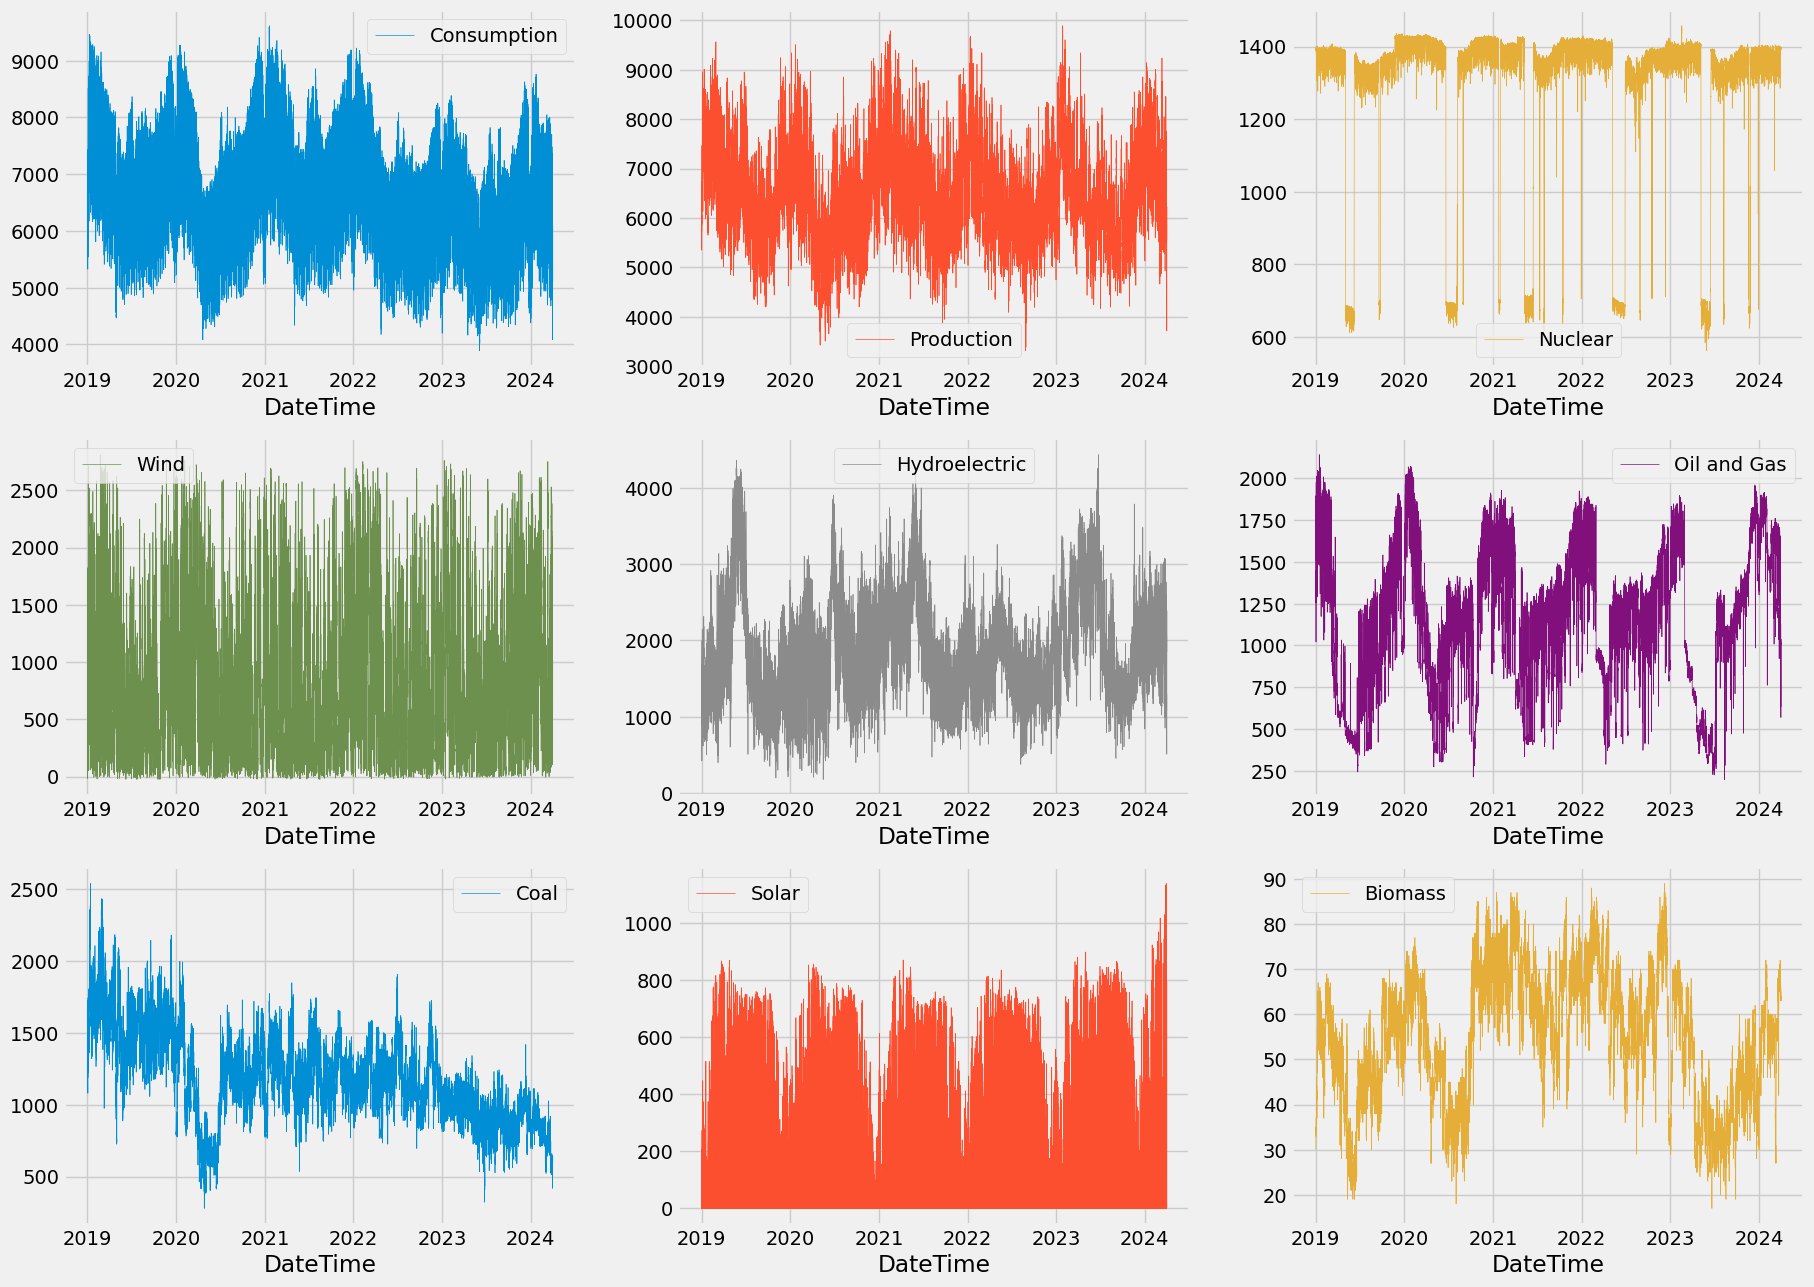

In [14]:
plt.style.use('fivethirtyeight')

df2 = df.copy("Deep")
df2 = df2.set_index('DateTime')

# Facet plots
df2.plot(subplots = True,
         linewidth=0.5,
         layout = (3,3),
         figsize= (20,15),
         sharex = False,
         sharey = False
         )
plt.show()

In [15]:
df_consumption = df[['DateTime','Consumption']]
df_consumption.head()

,DateTime,Consumption
0,2019-01-01 00:00:00,6352
1,2019-01-01 01:00:00,6116
2,2019-01-01 02:00:00,5873
3,2019-01-01 03:00:00,5682
4,2019-01-01 04:00:00,5557


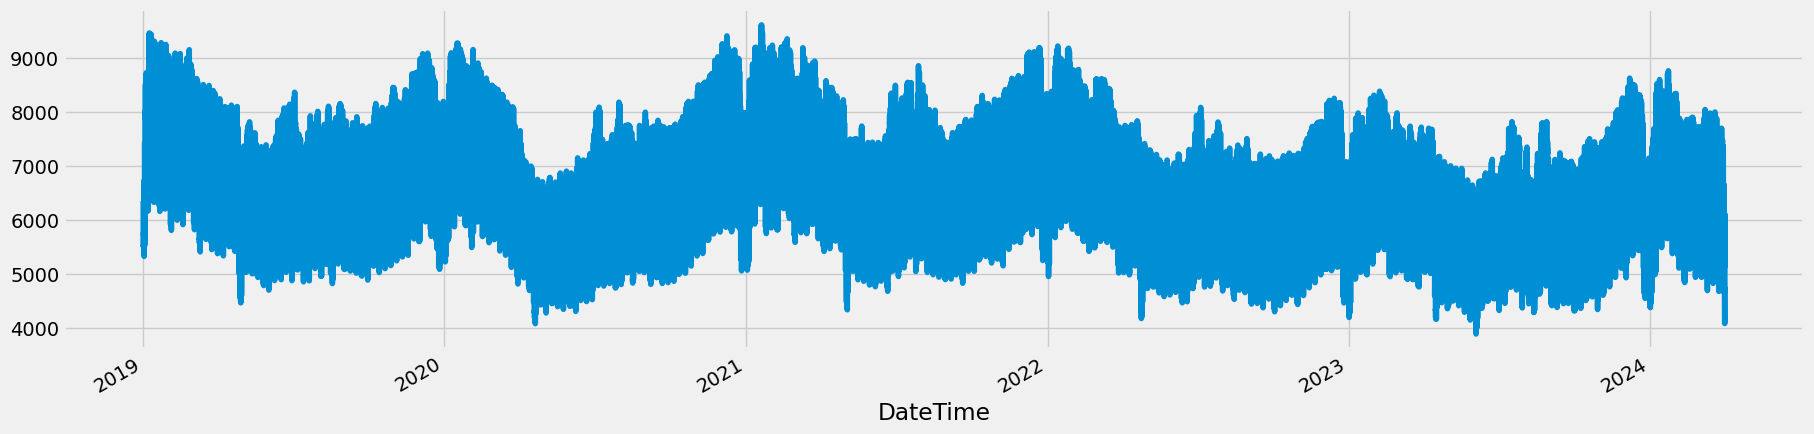

In [16]:
df5 = df_consumption.copy('Deep')
df5 = df5.set_index('DateTime')
df5['Consumption'].plot(figsize=(20,5))
plt.show()

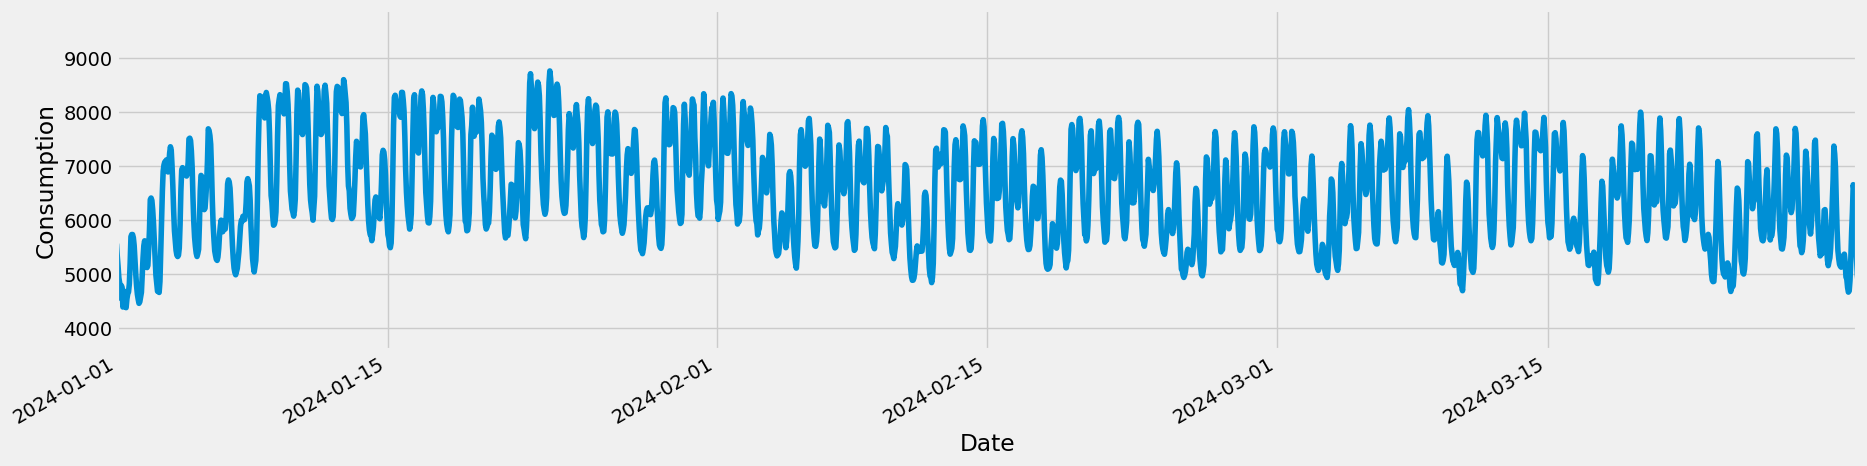

In [17]:
## xlimit and ylimit
df5['Consumption'].plot(xlim=['2024-01-01', '2024-03-31'],figsize=(20,5))
plt.ylabel('Consumption')
plt.xlabel('Date')
plt.show()

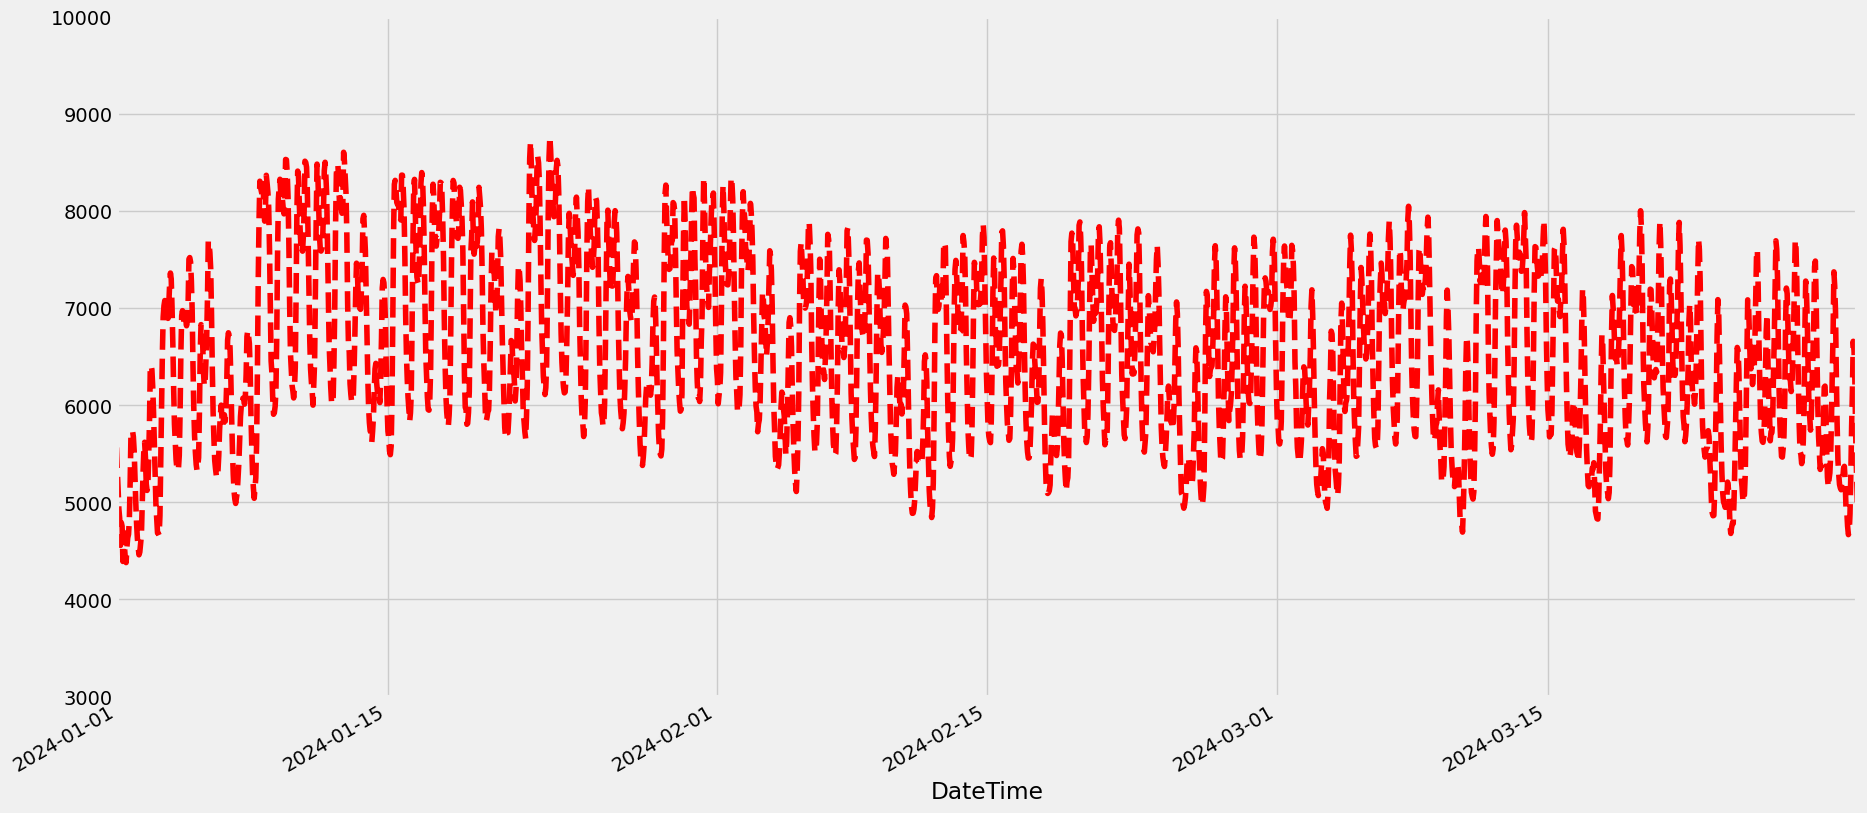

In [18]:
# x lim and y lim
df5['Consumption'].plot(xlim=['2024-01-01', '2024-03-31'], figsize=(20,10), ylim=[3000,10000],ls='--',c='Red')
plt.show()

In [19]:
index = df5.loc['2023-01-01' : '2023-09-01'].index
Consumption = df5.loc['2023-01-01' : '2023-09-01']['Consumption']
Consumption

,Consumption
DateTime,
2023-01-01 00:00:00,4996
2023-01-01 01:00:00,4995
2023-01-01 02:00:00,4816
2023-01-01 03:00:00,4627
2023-01-01 04:00:00,4581
...,...
2023-09-01 19:00:00,6704
2023-09-01 20:00:00,6932
2023-09-01 21:00:00,6712


In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


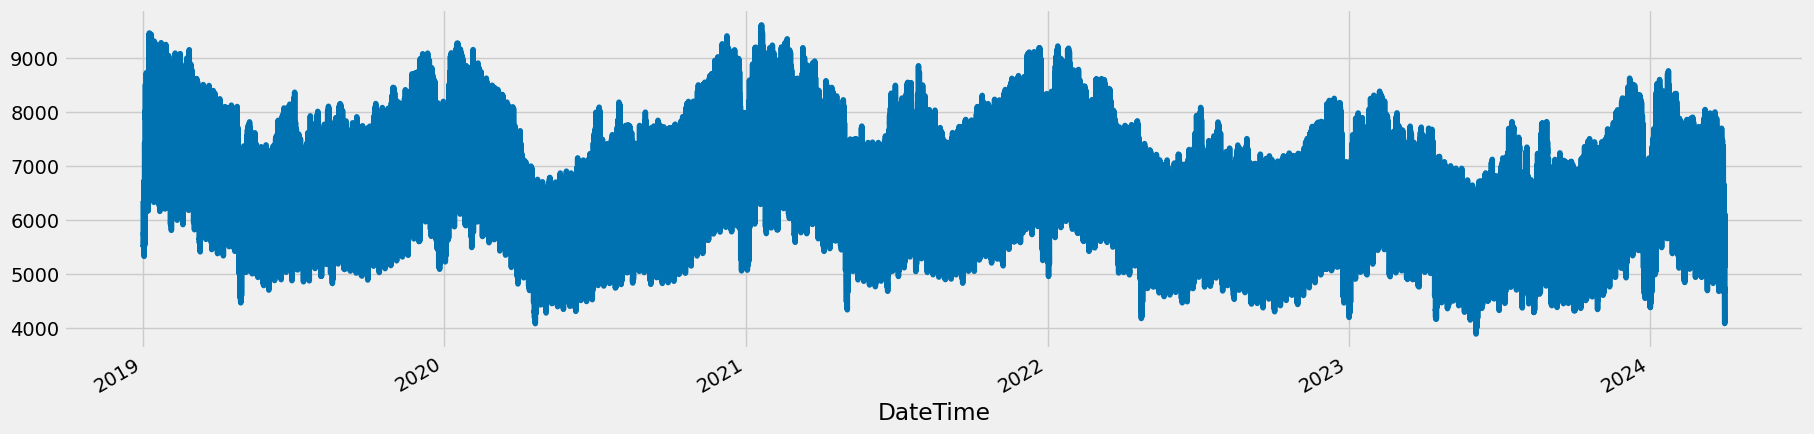

In [21]:
plt.style.use('seaborn-v0_8-colorblind')
df5 = df_consumption.copy('Deep')
df5 = df5.set_index('DateTime')
df5['Consumption'].plot(figsize=(20,5))
plt.show()

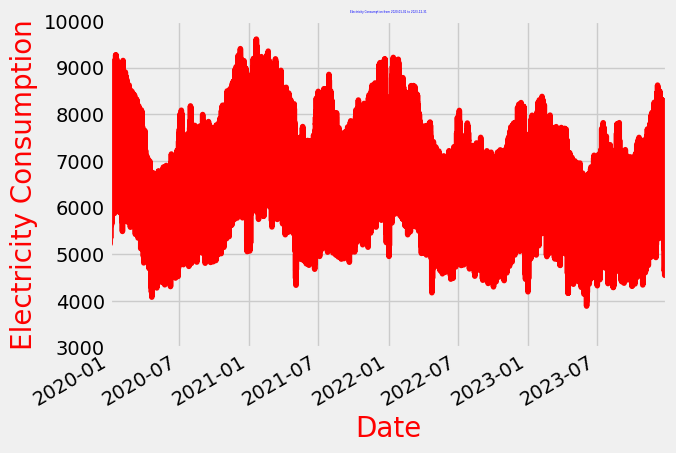

In [22]:
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim=[3000,10000], color='Red')
ax.set_xlabel('Date',color='Red',fontsize=20)
ax.set_ylabel('Electricity Consumption', color='Red', fontsize=20)
ax.set_title('Electricity Consumption from 2020-01-01 to 2023-12-31', color='Blue', fontsize=2,)
plt.show()

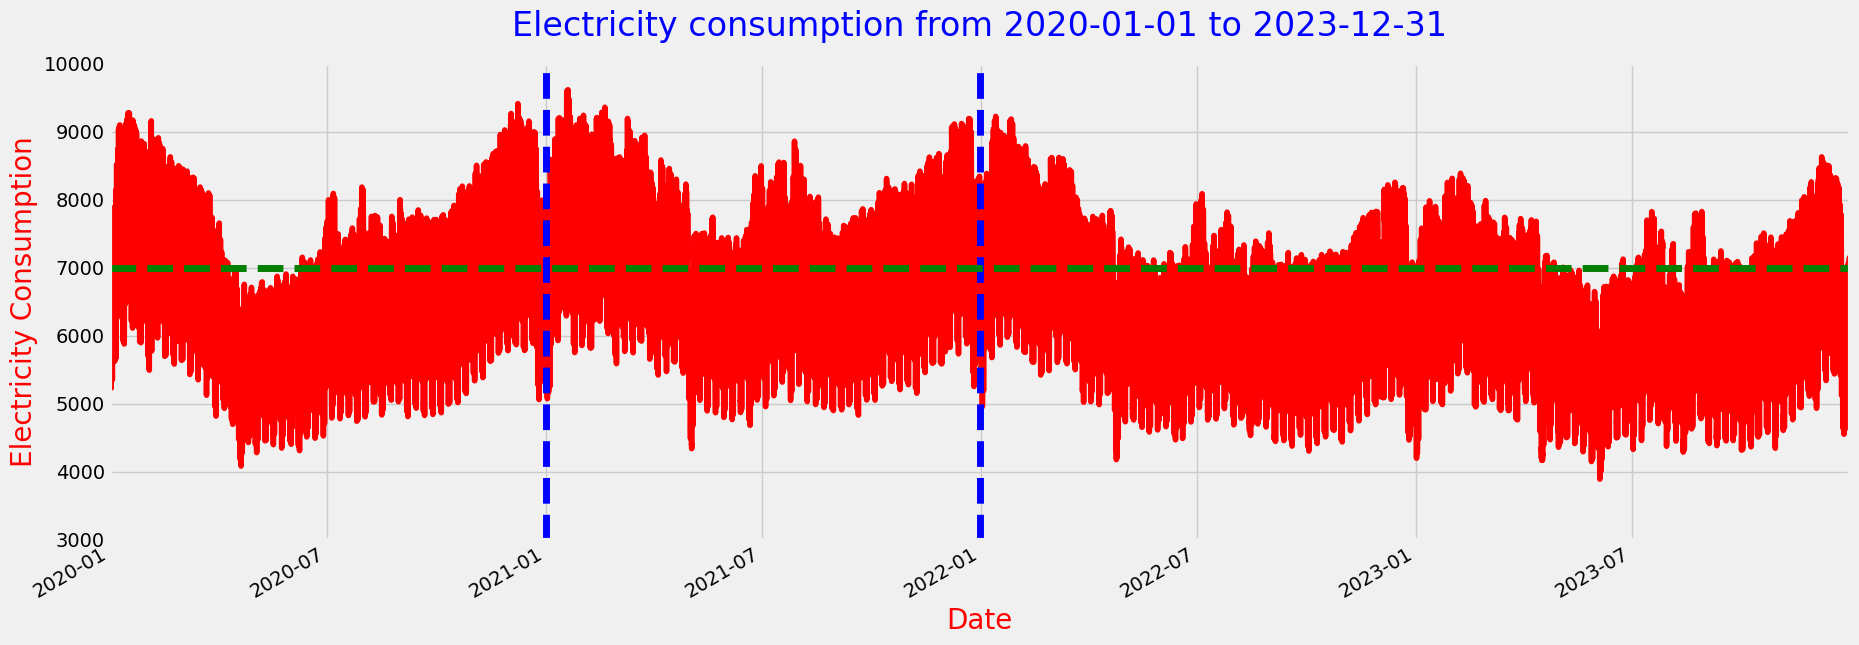

In [23]:
# adding markers
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim = [3000,10000], color='Red', figsize=(20,7))
ax.set_xlabel('Date',color="Red",fontsize=20)
ax.set_ylabel('Electricity Consumption',color="Red",fontsize=20)
ax.set_title('Electricity consumption from 2020-01-01 to 2023-12-31', color='Blue', fontsize=24,pad=20)

ax.axvline('2021-01-01' ,color='Blue', linestyle='--', lw= 5)
ax.axvline('2021-12-31', color='Blue', linestyle='--', lw=5)
ax.axhline(7000,color='green',linestyle='--', lw=5)
plt.show()

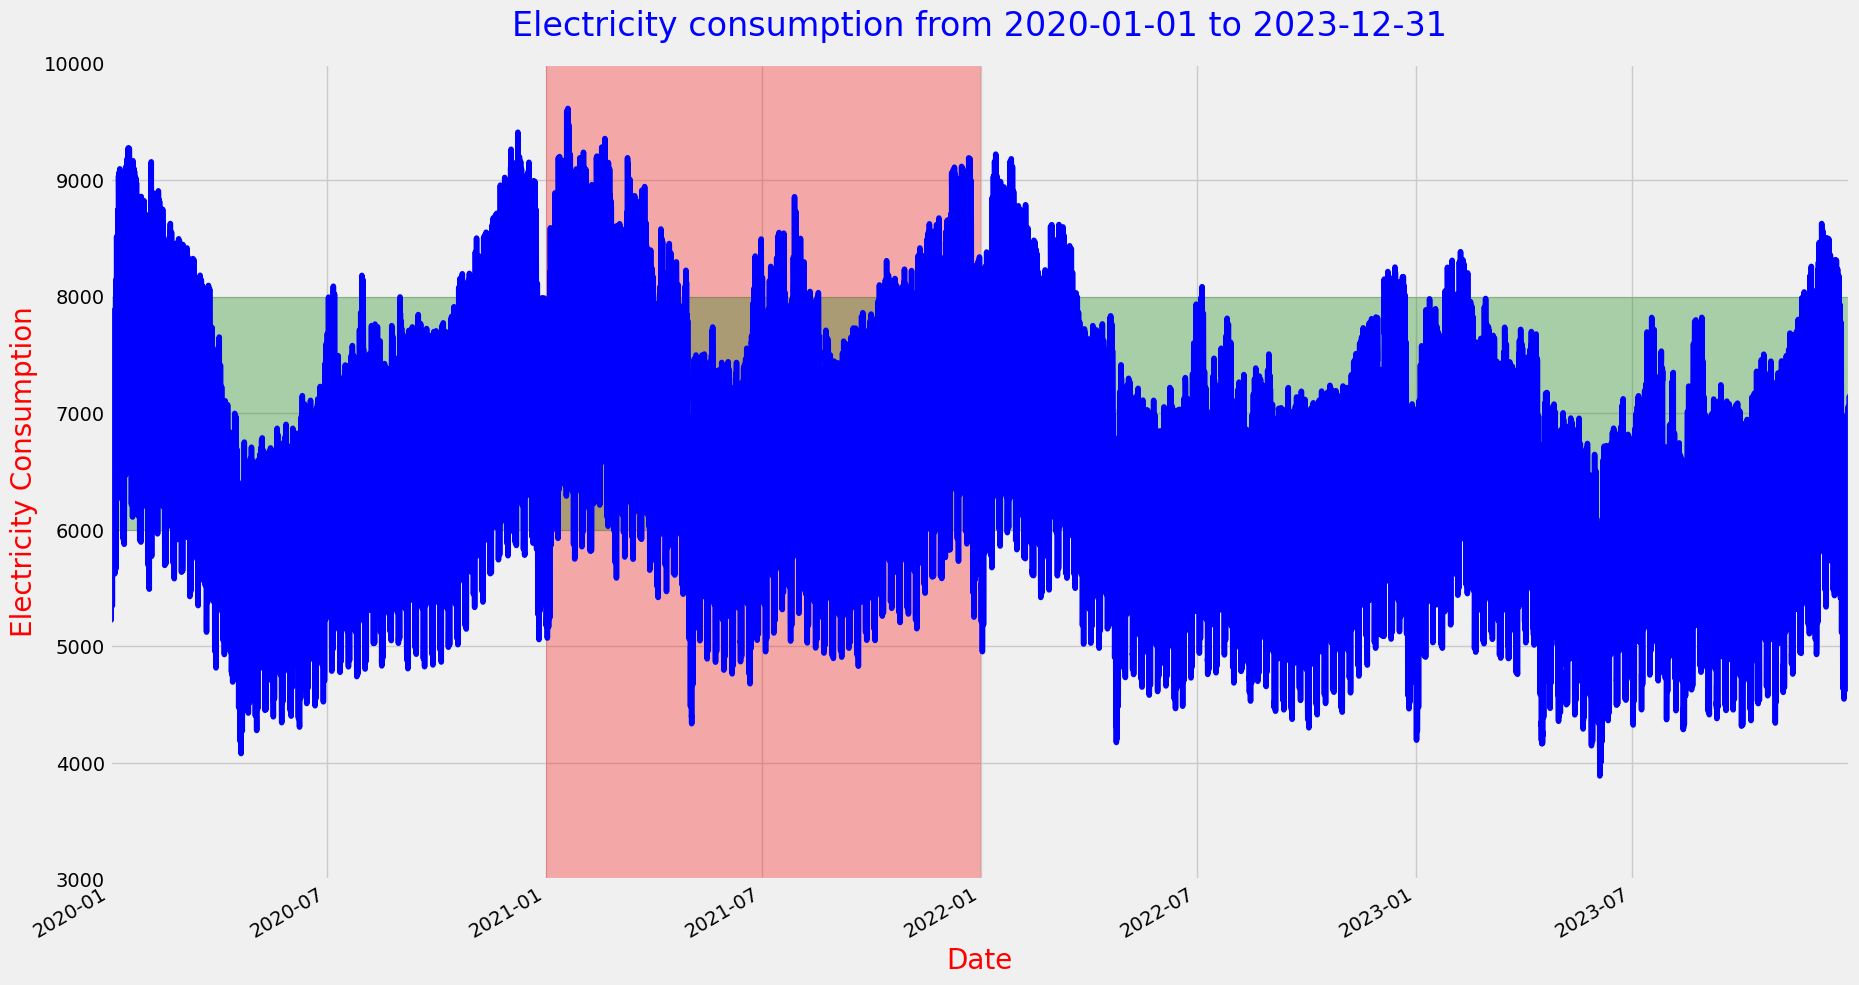

In [24]:
# Highlighting regions of interest
ax = df5['Consumption'].plot(xlim=['2020-01-01','2023-12-31'], ylim=[3000,10000], color="Blue", figsize=(20,12))
ax.set_xlabel('Date',color="Red", fontsize=20)
ax.set_ylabel("Electricity Consumption", color="Red", fontsize= 20)
ax.set_title("Electricity consumption from 2020-01-01 to 2023-12-31", color="Blue", fontsize=24,pad=20)

ax.axvspan('2021-01-01', '2021-12-31', color='Red', alpha=0.3)
ax.axhspan(8000,6000, color='green', alpha=0.3)
plt.show()

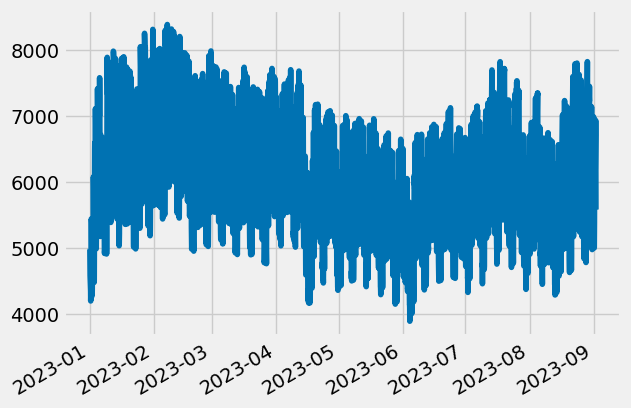

In [25]:
figure, axis = plt.subplots()
# plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,Consumption)

<Axes: xlabel='DateTime'>

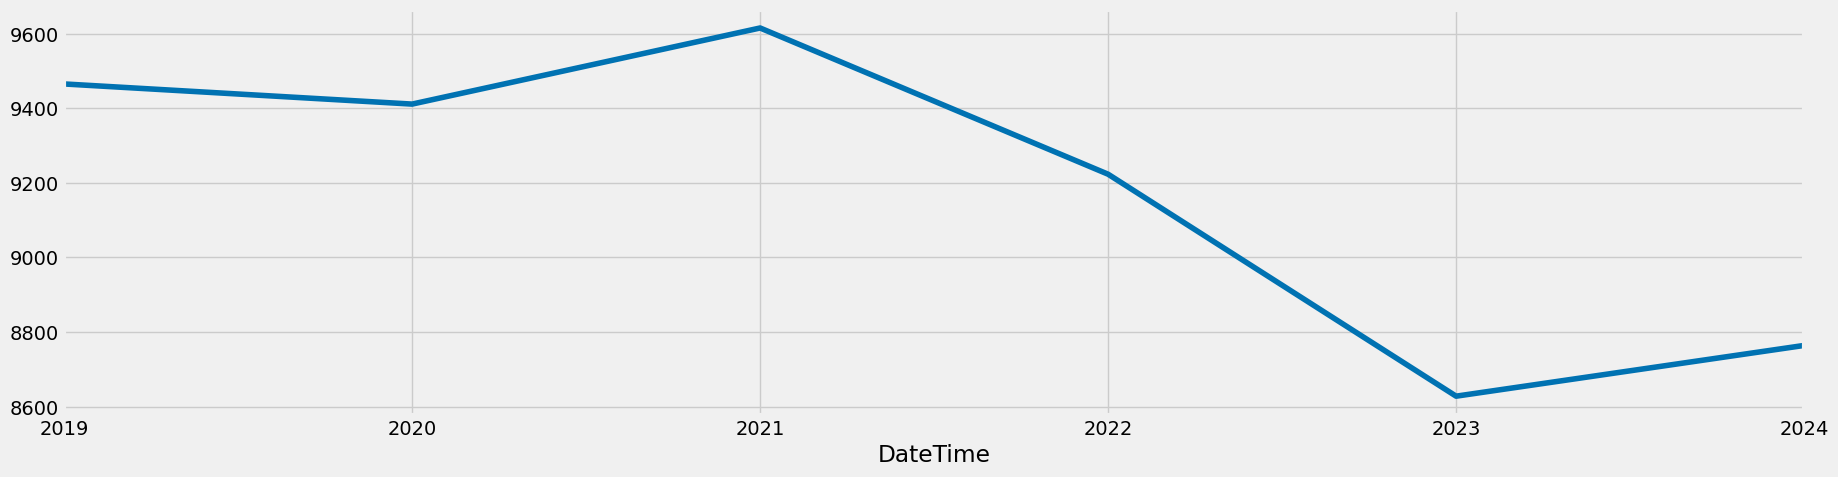

In [26]:
## year  end frequnecy
df5.resample(rule='A').max()['Consumption'].plot(figsize = (20,5))

<Axes: xlabel='DateTime'>

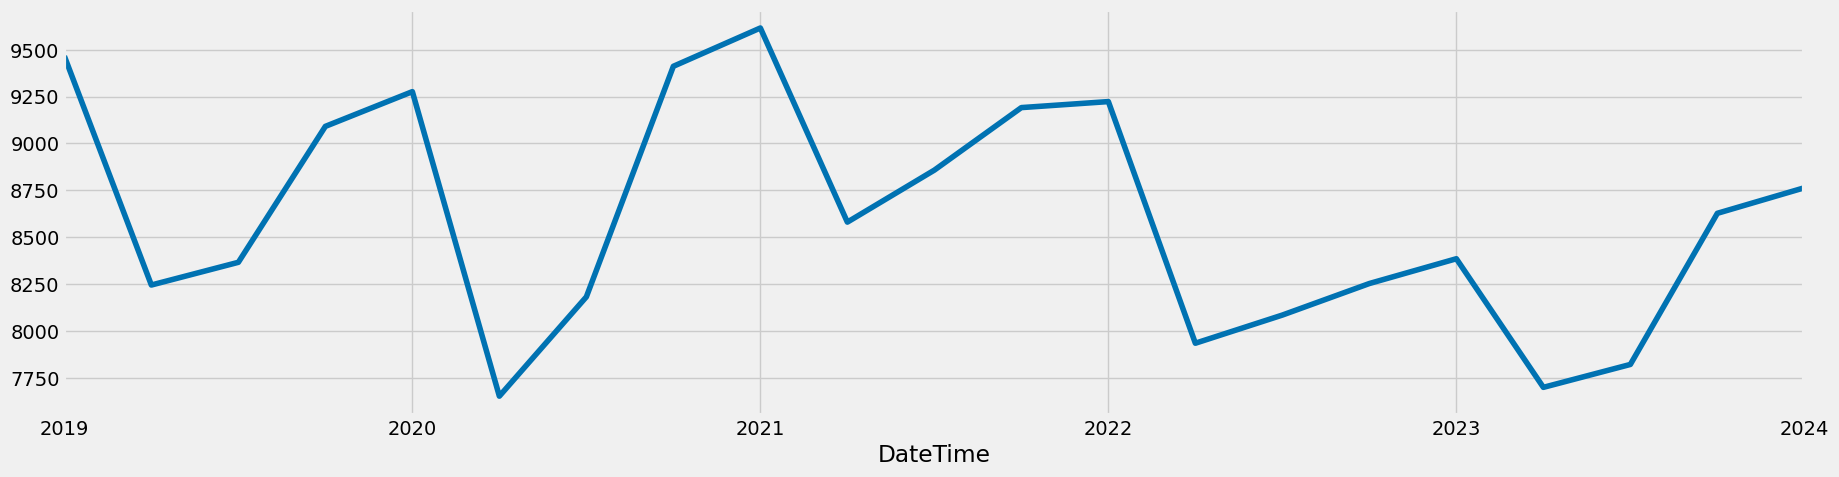

In [27]:
df5.resample(rule='Q').max()['Consumption'].plot(figsize = (20,5))

<Axes: xlabel='DateTime'>

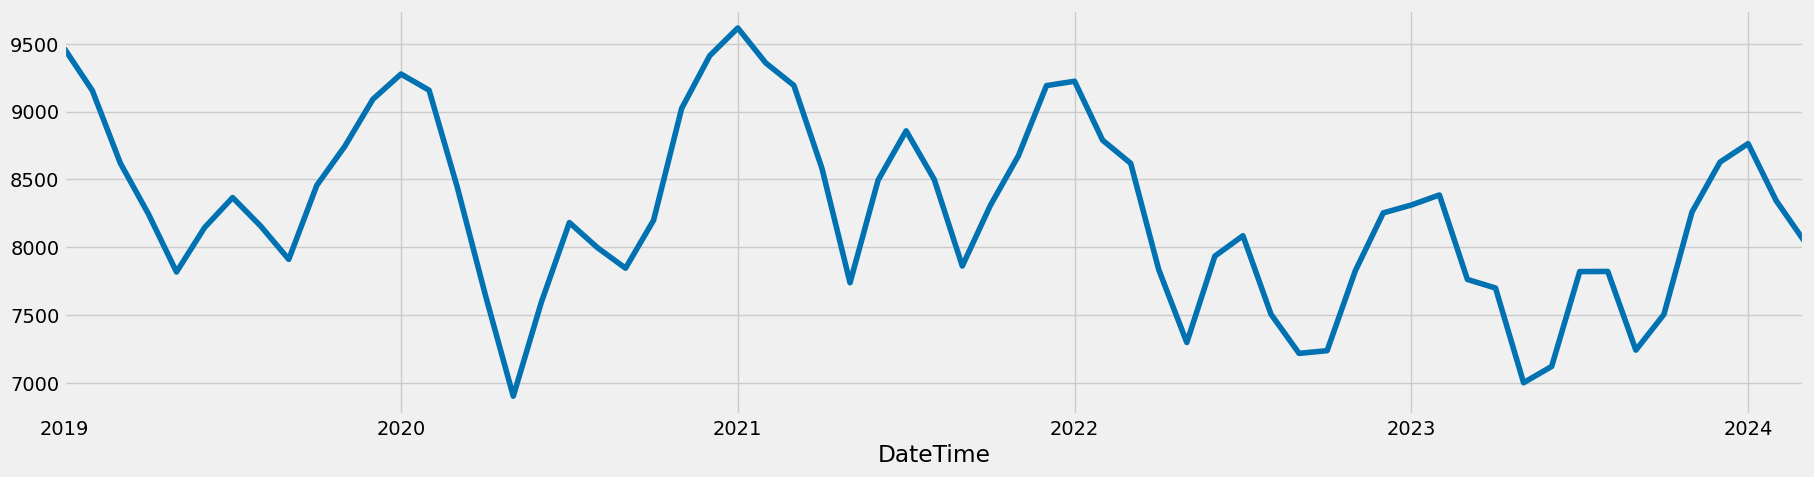

In [28]:
df5.resample(rule='M').max()['Consumption'].plot(figsize = (20,5))

In [29]:
index = df5.loc['2023-01-01' : '2023-09-01'].index
Consumption = df5.loc['2023-01-01' : '2023-09-01']['Consumption']
Consumption

,Consumption
DateTime,
2023-01-01 00:00:00,4996
2023-01-01 01:00:00,4995
2023-01-01 02:00:00,4816
2023-01-01 03:00:00,4627
2023-01-01 04:00:00,4581
...,...
2023-09-01 19:00:00,6704
2023-09-01 20:00:00,6932
2023-09-01 21:00:00,6712
